## Contents
1. [Introduction: Business Understanding](#1.-Introduction:-Business-Understanding)

2. [Data Understanding](#2.-Data-Understanding)

3. [Objectives](#3.-Objectives)

    3.1 [Objective 1 - Which mall could be the best choice to place shop?](#3.1-Objective-1---Which-mall-could-be-the-best-choice-to-place-shop?)
    
    3.2 [Objective 2 - What goods would likely sell best at the selected mall?](#3.2-Objective-2---What-goods-would-likely-sell-best-at-the-selected-mall?)
    
    3.3 [Objective 3 - Would the selected goods appeal more to males or females, or both equally?](#3.3-Objective-3---Would-the-selected-goods-appeal-more-to-males-or-females,-or-both-equally?)
    
    
4. [Evaluation](#4.-Evaluation)

5. [References](#5.-References)

# 1. Introduction: Business Understanding
A hypothestical scenerio is created whereupon some entrepreneur wishes to open a simple shop, say, in Istanbul but, before doing so, they wish to understand the local market and demand better. To whit, some of the questions they may ask could include the following:

* What might be the best location to setup a new shop?
* What goods might be worthwhile selling?
* Can demand be expected to vary between males and females?

To a Data Scientist, these questions become the business basis of all subsequent analyses which culminate in a simplified discussion that helps the entrepreneur make informed decisions based on the answers to the questions posed.



Before analyzing this data, I initialize my Python environment by loading the necessary libraries.

In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
%matplotlib inline


# 2. Data Understanding
To achieve this goal, the relevent data should comprise Retail information observed for most if not all malls in Istanbul. The [Customer Shopping Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset), (Aslan, 2023) should suffice. For more detailed description of the data, please follow the link provided. The Retail data is described as containing ...        
            
            
            detailed information on shopping transactions made by customers of different ages and genders in 10 shopping malls in Istanbul between 2021 and 2023. The dataset includes information such as the category of products purchased, payment method, order date, customer ID, and invoice number. The dataset has been published on Kaggle and is made available under the CC0 license, which means it can be used for any purpose by anyone. (Aslan, 2023).

As a result, I downloaded and saved this data locally so it could be available for analyses offline. This explains why I source the data locally in the following code.



In [7]:
# import data
df = pd.read_csv('~/Assingment1 - Write A Data Science Blog Post/customer_shopping_data.csv')
df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 3. Objectives

Each question posed by the entrepreneur is addressed as a seperate objective. Each section, in turn, is structured such that,
* the topic of that objective is the question itself, 
* the relevant portions of the data necessary to answer said question are isolated from the main dataset, described, cleaned by row-deleting missing data and analysed **(Data Preparation)**, 
* finally a conclusion to that section is given as the answer to the section's question **(Results Evalutation)**.  

## 3.1 Objective 1 - Which mall could be the best choice to place shop?

To answer the first question, the following variables were deemed sufficient:
* **shopping_mall** - This is a categorical variable listing the name of the mall where a transaction was carried out. Through this variable, mall-specific details can be retrieved. Without a valid mall name, subsequent analyses cannot be carried out so recordswith missing values here are removed. 
* **quantity** - This is a numeric variable giving the number of units of products that were sold from each mall. Clearly the entrepreneur will be interested in profitable location. I determine that a mall is potentially most profitable if it has recorded the largest sales comparatively. A quantity of zero means either nothing was sold from that mall or this data is missing. In either case, such a mall does not provide usable information to answer the question at hand.
* **price** - This too is a numeric variable as it captures the price of a unit sold. So, the profitability of a mall is further determined by relative margin computed as the product of quantity and unit price. Quantity alone would likely be insufficient as it is possible that a mall could to sell large volumes cheaply while another sells few but expensive items. A price of zero means either something was sold for free (highly unlikely) or this data is missing. In either case, such a mall does not provide usable information to answer the question at hand.

Based on the following analyses with respect to this particular question, the **Mall of Instanbul** is found to be the best possible location of all malls in the dataset. The price of a single unit of item sold from this mall was around 846 while having sold about 20% of all units across malls. Though Emaar Square Mall, Kanyon, Viaport Outlet and Zorlu Center have higher avergae unit  price compared to the Mall of Istanbul, the latter sold significantly higher stock for its price leading to relativey higher margin.


                   weighted_average_price
shopping_mall                            
Cevahir AVM                    845.885223
Emaar Square Mall              855.534121
Forum Istanbul                 828.435311
Istinye Park                   835.527836
Kanyon                         850.265420
Mall of Istanbul               846.266788
Metrocity                      830.908080
Metropol AVM                   831.310619
Viaport Outlet                 850.865705
Zorlu Center                   846.859250
                   total_units_sold_per_mall
shopping_mall                               
Cevahir AVM                         0.050045
Emaar Square Mall                   0.048545
Forum Istanbul                      0.049720
Istinye Park                        0.098640
Kanyon                              0.199045
Mall of Istanbul                    0.201244
Metrocity                           0.150292
Metropol AVM                        0.102205
Viaport Outlet                      0.049265
Z

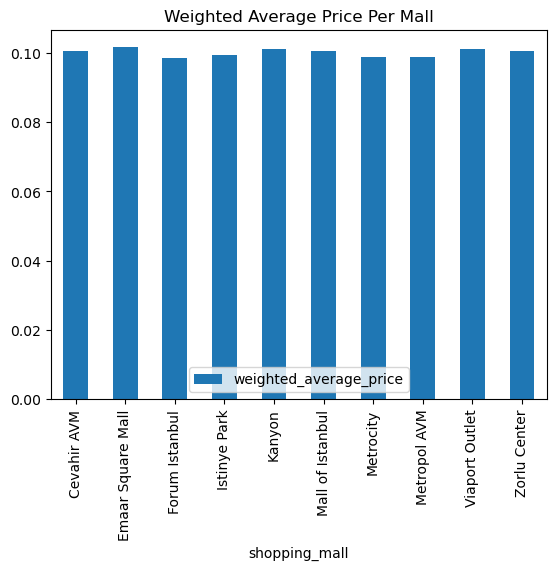

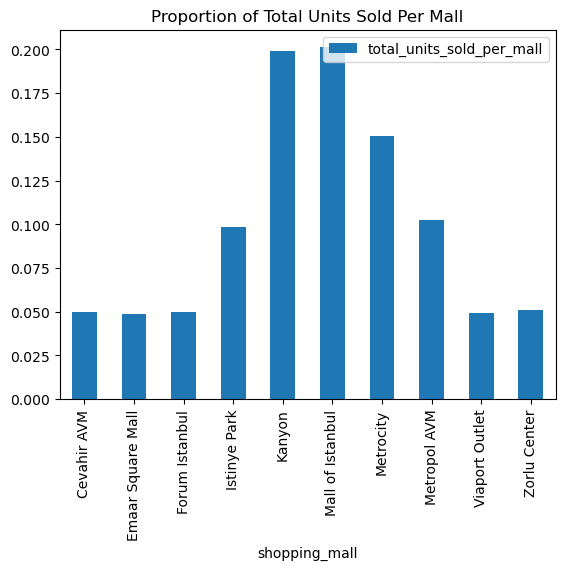

In [11]:

# 1.1 Isolate columns of interest
mall_check = pd.DataFrame(df[['shopping_mall', 'quantity', 'price']])

# 1.2 clean data
mall_check = mall_check[mall_check['shopping_mall'].notnull()]
mall_check.drop(mall_check[mall_check['quantity'] == 0].index, inplace = True)
mall_check.drop(mall_check[mall_check['price'] == 0].index, inplace = True)

# 1.3 customize data by compute total item cost
mall_check['total_cost'] = mall_check['quantity'] * mall_check['price']

# 1.4 check if average cost is variable across malls 
mall_check_df = pd.DataFrame() 
mall_check_df['total_cost_per_mall'] = mall_check.groupby(['shopping_mall']).agg({'total_cost': 'sum'})
mall_check_df['total_units_sold_per_mall'] = mall_check.groupby(['shopping_mall']).agg({'quantity': 'sum'})
mall_check_df['weighted_average_price'] = mall_check_df['total_cost_per_mall']  / mall_check_df['total_units_sold_per_mall']

# 1.5 present the average cost as a proportion of total across all malls
display_avg_price = mall_check_df.groupby(['shopping_mall']).agg({'weighted_average_price': 'sum'})
print(display_avg_price)

# 1.6 plot and display proportion distribution of weighted average price per item
(display_avg_price / display_avg_price['weighted_average_price'].sum()).plot(kind="bar");
plt.title("Weighted Average Price Per Mall");

# NOTE: the relatively constant price per unit shown above shows that all malls likely prices their goods the same. 
# so the driving factor in answering the question would be to analyze the quantity distribution across all malls

# 1.7 compute total units sold by each mall
display_units_sold = mall_check_df.groupby(['shopping_mall']).agg({'total_units_sold_per_mall': 'sum'}) / mall_check_df['total_units_sold_per_mall'].sum()
print(display_units_sold)

# 1.8 plot and display proportion distribution of units sold across all malls
(display_units_sold).plot(kind="bar");
plt.title("Proportion of Total Units Sold Per Mall");

# save plot output to local drive
plt.savefig("C:/Users/brian.meki/Desktop/Udacity/Udacity_Assignment_on_Git/Q1_plot.png")

plt.show()



## 3.2 Objective 2 - What goods would likely sell best at the selected mall?

Having determined the best possible location for the entrepreneur's new shop, the next step it to determine the best type of product(s) to be sold from said shop if it will be located within the Mall of Istanbul. To this effect, the variables **shopping_mall** and **quantity** are used again. In addition, product **category** is also considered. The later is a string variable that captures the products' respective categories.

From the following analyses, the entrepreneur's shop might get off to a good start if it sold Clothing, Cosmetics and Food & Beverage. This is because these three product catergories are shown to have sold approximately 65% of all units sold from the Mall of Istanbul with the three categories claiming 35%, 15% and 15% respectively. 

                 total_units_sold_per_category  prop_units_sold_per_category
category                                                                    
Books                                     3099                      0.051552
Clothing                                 20813                      0.346226
Cosmetics                                 9193                      0.152926
Food & Beverage                           8878                      0.147686
Shoes                                     6112                      0.101673
Souvenir                                  2921                      0.048591
Technology                                3067                      0.051020
Toys                                      6031                      0.100326


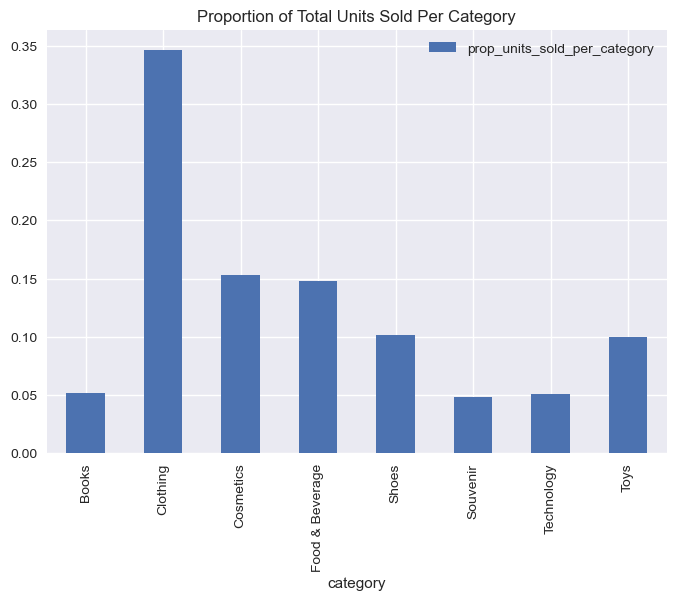

In [18]:

# 2.1 Isolate columns of interest
product_check = pd.DataFrame(df[['shopping_mall', 'category', 'quantity']])

# 2.2 clean data
product_check = product_check[product_check['shopping_mall'].notnull()]
product_check = product_check[product_check['category'].notnull()]
product_check.drop(product_check[product_check['quantity'] == 0].index, inplace = True)

# 2.3 filter data for preferred mall
product_check = product_check[product_check['shopping_mall'] == 'Mall of Istanbul']

# 2.4 sum quantity by product category 
product_cat_df = pd.DataFrame()
product_cat_df['total_units_sold_per_category'] = product_check.groupby(['category']).agg({'quantity': 'sum'}) 
product_cat_df['prop_units_sold_per_category'] = product_cat_df['total_units_sold_per_category'] / product_cat_df['total_units_sold_per_category'].sum()
print(product_cat_df)

# 2.5 plot and display proportion distribution of units sold across all product categories
product_cat_prop = product_cat_df.groupby(['category']).agg({'prop_units_sold_per_category': 'mean'})
(product_cat_prop).plot(kind="bar");
plt.title("Proportion of Total Units Sold Per Category");

# save plot output to local drive
plt.savefig("C:/Users/brian.meki/Desktop/Udacity/Udacity_Assignment_on_Git/Q2_plot.png")

plt.show()

## 3.3 Objective 3 - Would the selected goods appeal more to males or females, or both equally?

To maximise profitability and sustainability of the shop, the entrepreneur will do well to understand the shopping behaviour their potential customers. This will influence the type of stock the shop sells under the more profitable categories such as Clothing and Cosmetics as determined earlier. To help in this, the **shopping_mall** and **quantity** variables are retained again and a new variable **gender** is included in the analysis. 

Here I learn that on average, both males and females tend to purchase the same number of units (3.1) with the latter showing slightly more variability with a standard deviation of about 1.41 compared to 1.40 for the former.

In [20]:

# create a function that takes as input the name of a mall, computes and returns 
# the average and standard deviation of units sold with respect to gender

def simple_stats_fun(this_mall):
    '''
    INPUT
        this_mall - a string of one of the values from the shopping_mall column
    
    OUTPUT
        male and female average and standard deviation of units sold
    
    '''
    # 3.1 Isolate columns of interest
    gender_check = pd.DataFrame(df[['shopping_mall', 'gender', 'quantity']])

    # 3.2 clean data
    gender_check = gender_check[gender_check['shopping_mall'].notnull()]
    gender_check = gender_check[gender_check['gender'].notnull()]
    gender_check.drop(gender_check[gender_check['quantity'] == 0].index, inplace = True)

    # 3.3 filter data for preferred mall
    gender_check = gender_check[gender_check['shopping_mall'] == this_mall]

    # 3.4 sum quantity by gender 
    simple_stats =  pd.DataFrame()
    simple_stats['Average_Units'] = gender_check.groupby(['gender']).agg({'quantity': 'mean'})
    simple_stats['Standard_Deviation'] = gender_check.groupby(['gender']).agg({'quantity': 'std'})

    return simple_stats

# generate simple statistics for the Mall of Istanbul
simple_stats_fun('Mall of Istanbul')


,Average_Units,Standard_Deviation
gender,,
Female,3.013275,1.412011
Male,3.015794,1.406674


# 4. Evaluation

Based on the [Customer Shopping Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset) (Aslan, 2023),
the entrepreneur will do well to locate their shop in the Mall of Istanbul where they can should prioritize selling Clothing, Cosmetics and Food & Beverage to maximize profitability. Sustainability should be easier to achieve as long as they cater equally to both males and females. 

A less technical analysis of this study can be found in my blog post linked [here](https://medium.com/@brian.meki/location-location-location-90e98232ad87).

# 5. References

1. ASLAN, M. T. (2023, April). Customer Shopping Dataset - Retail Sales Data, Version 1. Retrieved November 8, 2023. from https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset/data. 
